In [1]:
import pandas as pd

In [2]:
year_to_sparcs_key = {2009: "q6hk-esrj", 2010: "mtfm-rxf4", 2011: "pyhr-5eas", 2012: "u4ud-w55t",
                      2013: "npsr-cm47", 2014: "rmwa-zns4"}

In [3]:
base_url = "https://health.data.ny.gov/resource/"

In [4]:
def get_df_across_multiple_files(key_dict, base_url, search_query, row_limit=10000):
    df_dict = {} # Store df as keys
    for key in key_dict:
        ds_hash = key_dict[key]
        request_url = base_url + ds_hash + ".json" + "?" + search_query + "&$limit=" + str(row_limit)
        print("Extracting %s with '%s'" % (key, request_url))
        df = pd.read_json(request_url)
        df_dict[key] = df
    return df_dict

In [5]:
kd_df_dicts = get_df_across_multiple_files(year_to_sparcs_key, base_url, "ccs_procedure_code=105")

Extracting 2009 with 'https://health.data.ny.gov/resource/q6hk-esrj.json?ccs_procedure_code=105&$limit=10000'
Extracting 2010 with 'https://health.data.ny.gov/resource/mtfm-rxf4.json?ccs_procedure_code=105&$limit=10000'
Extracting 2011 with 'https://health.data.ny.gov/resource/pyhr-5eas.json?ccs_procedure_code=105&$limit=10000'
Extracting 2012 with 'https://health.data.ny.gov/resource/u4ud-w55t.json?ccs_procedure_code=105&$limit=10000'
Extracting 2013 with 'https://health.data.ny.gov/resource/npsr-cm47.json?ccs_procedure_code=105&$limit=10000'
Extracting 2014 with 'https://health.data.ny.gov/resource/rmwa-zns4.json?ccs_procedure_code=105&$limit=10000'


In [6]:
def create_single_df_from_df_dict(df_dict, key_name):
    """Build a single dataframe that that has a new field called key_name with the key values in df_dict"""
    df_keys = df_dict.keys()
    base_df = df_dict[df_keys[0]]
    base_df[key_name] = df_keys[0]
    for df_key in df_keys[1:]:
        df = df_dict[df_key]
        df[key_name] = df_key
        base_df = base_df.append(df, ignore_index=True)
    return base_df

In [7]:
kidney_cy_09_14 = create_single_df_from_df_dict(kd_df_dicts, "discharge_year")

In [8]:
kidney_cy_09_14.discharge_year.count()

6906

In [9]:
kidney_cy_09_14.groupby("discharge_year")["length_of_stay"].count()

discharge_year
2009    1217
2010    1132
2011    1170
2012    1157
2013    1061
2014    1169
Name: length_of_stay, dtype: int64

In [10]:
kidney_cy_09_14["length_of_stay"] = pd.to_numeric(kidney_cy_09_14["length_of_stay"], errors='coerce')

In [11]:
kidney_cy_09_14.groupby(["facility_name"])["length_of_stay"].mean()

facility_name
Albany Medical Center Hospital                                          9.535714
Bellevue Hospital Center                                                7.000000
Buffalo General Hospital                                                7.728395
Erie County Medical Center                                              6.071698
Montefiore Med Center - Jack D Weiler Hosp of A Einstein College Div    2.000000
Montefiore Medical Center - Henry & Lucy Moses Div                      7.349296
Mount Sinai Hospital                                                    6.160763
Mount Sinai St. Lukes                                                   8.837838
NYU Hospitals Center                                                    6.210526
New York Presbyterian Hospital - Columbia Presbyterian Center           7.361171
New York Presbyterian Hospital - New York Weill Cornell Center          5.519386
North Shore University Hospital                                         4.750000
Rochester Gene

In [12]:
kidney_cy_09_14.discharge_year.head()

0    2009
1    2009
2    2009
3    2009
4    2009
Name: discharge_year, dtype: int64

In [13]:
kidney_cy_09_14.apr_drg_description.head()

0    KIDNEY TRANSPLANT
1    KIDNEY TRANSPLANT
2    KIDNEY TRANSPLANT
3    KIDNEY TRANSPLANT
4    KIDNEY TRANSPLANT
Name: apr_drg_description, dtype: object

In [14]:
kd_df_dicts[2011].length_of_stay.head()

0     7
1    11
2     6
3     8
4     8
Name: length_of_stay, dtype: int64

In [15]:
pd.crosstab(kidney_cy_09_14["facility_name"],  kidney_cy_09_14["discharge_year"], margins=True)

discharge_year,2009,2010,2011,2012,2013,2014,All
facility_name,,,,,,,
Albany Medical Center Hospital,50,46,45,48,37,55,281
Bellevue Hospital Center,1,0,0,0,0,0,1
Buffalo General Hospital,65,57,40,0,0,0,162
Erie County Medical Center,33,8,23,66,61,74,265
Montefiore Med Center - Jack D Weiler Hosp of A Einstein College Div,0,1,0,0,0,0,1
Montefiore Medical Center - Henry & Lucy Moses Div,112,101,104,132,106,155,710
Mount Sinai Hospital,188,165,212,199,176,162,1102
Mount Sinai St. Lukes,0,0,14,15,8,0,37
NYU Hospitals Center,19,16,30,17,26,25,133


In [16]:
import numpy as np

In [17]:
pd.crosstab(kidney_cy_09_14["facility_name"],  kidney_cy_09_14["discharge_year"], 
            margins=True, values=kidney_cy_09_14["length_of_stay"],aggfunc=np.mean)

discharge_year,2009,2010,2011,2012,2013,2014,All
facility_name,,,,,,,
Albany Medical Center Hospital,9.580000,11.000000,9.577778,7.958333,9.972222,9.327273,9.535714
Bellevue Hospital Center,7.000000,NaN,NaN,NaN,NaN,NaN,7.000000
Buffalo General Hospital,8.769231,6.771930,7.400000,NaN,NaN,NaN,7.728395
Erie County Medical Center,8.212121,5.750000,6.391304,5.439394,5.426230,6.148649,6.071698
Montefiore Med Center - Jack D Weiler Hosp of A Einstein College Div,NaN,2.000000,NaN,NaN,NaN,NaN,2.000000
Montefiore Medical Center - Henry & Lucy Moses Div,7.455357,7.772277,8.182692,7.742424,6.801887,6.477419,7.349296
Mount Sinai Hospital,5.691489,5.533333,6.000000,6.459596,6.125000,7.228395,6.160763
Mount Sinai St. Lukes,NaN,NaN,8.642857,9.333333,8.250000,NaN,8.837838
NYU Hospitals Center,7.526316,7.000000,5.133333,5.705882,6.576923,5.960000,6.210526


In [18]:
pd.crosstab(kidney_cy_09_14["facility_name"],  kidney_cy_09_14["discharge_year"], 
            margins=True, values=kidney_cy_09_14["length_of_stay"],aggfunc=np.median)

C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


discharge_year,2009,2010,2011,2012,2013,2014,All
facility_name,,,,,,,
Albany Medical Center Hospital,7.0,7.5,7.0,7.0,8.0,8.0,8.0
Bellevue Hospital Center,7.0,NaN,NaN,NaN,NaN,NaN,7.0
Buffalo General Hospital,6.0,6.0,6.0,NaN,NaN,NaN,6.0
Erie County Medical Center,6.0,5.5,6.0,5.0,5.0,6.0,5.0
Montefiore Med Center - Jack D Weiler Hosp of A Einstein College Div,NaN,2.0,NaN,NaN,NaN,NaN,2.0
Montefiore Medical Center - Henry & Lucy Moses Div,7.0,6.0,7.0,6.0,6.0,5.0,6.0
Mount Sinai Hospital,5.0,5.0,5.0,5.0,5.0,6.0,5.0
Mount Sinai St. Lukes,NaN,NaN,8.5,8.0,8.0,NaN,8.0
NYU Hospitals Center,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [19]:
import seaborn as sb

In [20]:
%matplotlib inline

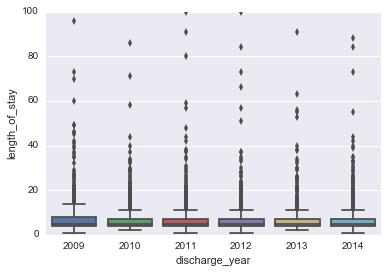

In [21]:
sb.boxplot(y="length_of_stay", x="discharge_year", data=kidney_cy_09_14)

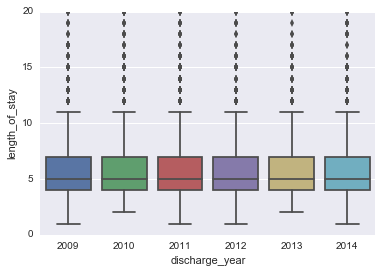

In [22]:
sb.boxplot(y="length_of_stay", x="discharge_year", data=kidney_cy_09_14[kidney_cy_09_14["length_of_stay"] <= 20])

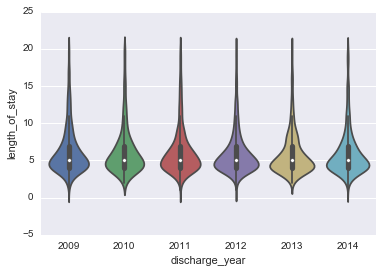

In [23]:
sb.violinplot(y="length_of_stay", x="discharge_year", data=kidney_cy_09_14[kidney_cy_09_14["length_of_stay"] <= 20])

In [24]:
kidney_cy_09_14.to_csv("./data/sparcs_ny_kidney_transplants_2009_2014.csv")